### Importaci√≥n de datos



In [95]:
import pandas as pd

tienda = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv")
tienda2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv")
tienda3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv")
tienda4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv")

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [88]:
import pandas as pd

tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

ingresos = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}

for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.2f}")

resumen = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
print("\nResumen:")
print(resumen)

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

Resumen:
     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


# 2. Ventas por categor√≠a


=== Tienda 1 ===
Categor√≠as m√°s vendidas:
              Categor√≠a  Cantidad Vendida
                Muebles               465
           Electr√≥nicos               448
               Juguetes               324
      Electrodom√©sticos               312
   Deportes y diversi√≥n               284
 Instrumentos musicales               182
                 Libros               173
Art√≠culos para el hogar               171


<Figure size 1000x500 with 0 Axes>

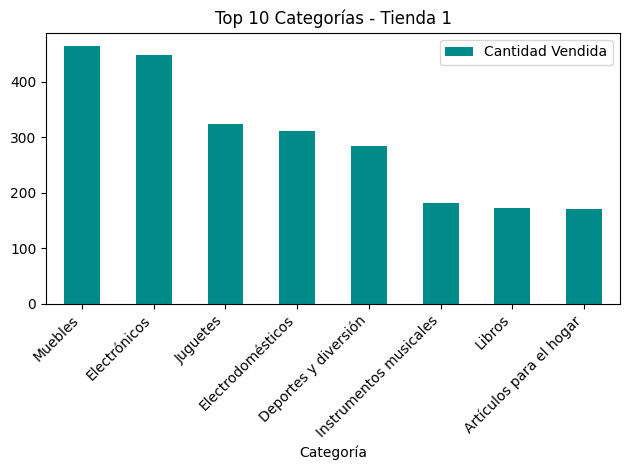


=== Tienda 2 ===
Categor√≠as m√°s vendidas:
              Categor√≠a  Cantidad Vendida
                Muebles               442
           Electr√≥nicos               422
               Juguetes               313
      Electrodom√©sticos               305
   Deportes y diversi√≥n               275
 Instrumentos musicales               224
                 Libros               197
Art√≠culos para el hogar               181


<Figure size 1000x500 with 0 Axes>

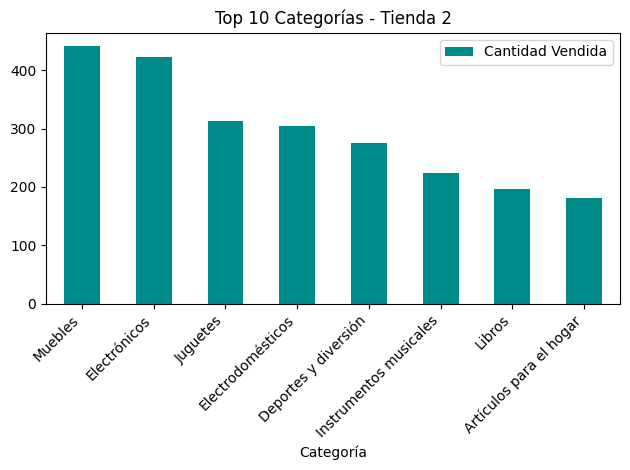


=== Tienda 3 ===
Categor√≠as m√°s vendidas:
              Categor√≠a  Cantidad Vendida
                Muebles               499
           Electr√≥nicos               451
               Juguetes               315
      Electrodom√©sticos               278
   Deportes y diversi√≥n               277
                 Libros               185
 Instrumentos musicales               177
Art√≠culos para el hogar               177


<Figure size 1000x500 with 0 Axes>

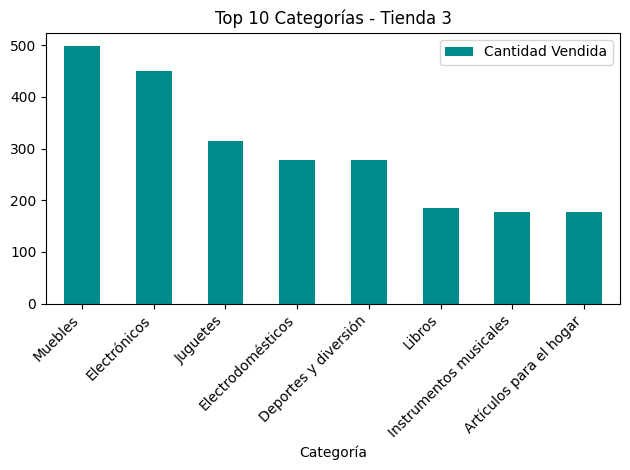


=== Tienda 4 ===
Categor√≠as m√°s vendidas:
              Categor√≠a  Cantidad Vendida
                Muebles               480
           Electr√≥nicos               451
               Juguetes               338
   Deportes y diversi√≥n               277
      Electrodom√©sticos               254
Art√≠culos para el hogar               201
                 Libros               187
 Instrumentos musicales               170


<Figure size 1000x500 with 0 Axes>

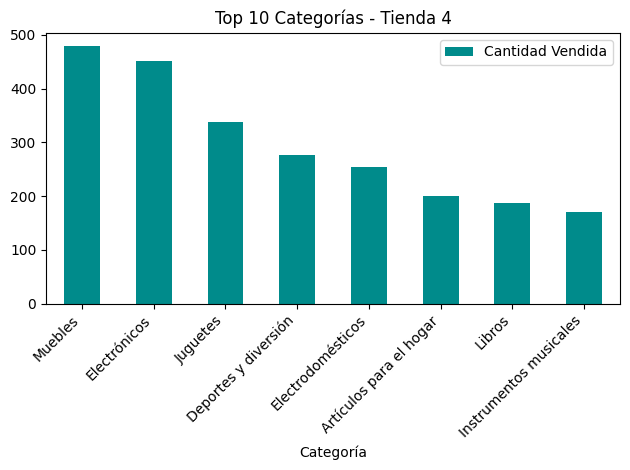

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con tus DataFrames (aseg√∫rate que est√°n cargados correctamente)
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Procesamiento para cada tienda
for nombre, df in tiendas.items():
    print(f"\n=== {nombre} ===")
    print("Categor√≠as m√°s vendidas:")

    # Verificamos que la columna existe
    if 'Categor√≠a del Producto' in df.columns:
        # Conteo por categor√≠a (ordenado de mayor a menor)
        ventas_por_categoria = df['Categor√≠a del Producto'].value_counts().reset_index()
        ventas_por_categoria.columns = ['Categor√≠a', 'Cantidad Vendida']

        # Mostrar tabla formateada
        print(ventas_por_categoria.to_string(index=False))

        # Gr√°fico de barras (top 10)
        plt.figure(figsize=(10, 5))
        ventas_por_categoria.head(10).plot.bar(
            x='Categor√≠a',
            y='Cantidad Vendida',
            title=f'Top 10 Categor√≠as - {nombre}',
            color='darkcyan'
        )
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: La columna 'Categor√≠a del Producto' no existe en {nombre}")
        print("Columnas disponibles:", df.columns.tolist())

# 3. Calificaci√≥n promedio de la tienda



=== Tienda 1 ===
An√°lisis de satisfacci√≥n:
Calificaci√≥n promedio: 3.98

Calificaci√≥n por categor√≠a:
Categor√≠a del Producto
Juguetes                   4.077160
Instrumentos musicales     4.049451
Electrodom√©sticos          4.032051
Electr√≥nicos               4.004464
Libros                     3.976879
Muebles                    3.946237
Deportes y diversi√≥n       3.897887
Art√≠culos para el hogar    3.748538

=== Tienda 2 ===
An√°lisis de satisfacci√≥n:
Calificaci√≥n promedio: 4.04

Calificaci√≥n por categor√≠a:
Categor√≠a del Producto
Muebles                    4.092760
Electrodom√©sticos          4.072131
Art√≠culos para el hogar    4.071823
Deportes y diversi√≥n       4.065455
Instrumentos musicales     4.035714
Juguetes                   4.025559
Electr√≥nicos               3.971564
Libros                     3.949239

=== Tienda 3 ===
An√°lisis de satisfacci√≥n:
Calificaci√≥n promedio: 4.05

Calificaci√≥n por categor√≠a:
Categor√≠a del Producto
Juguetes                  

<Figure size 1000x500 with 0 Axes>

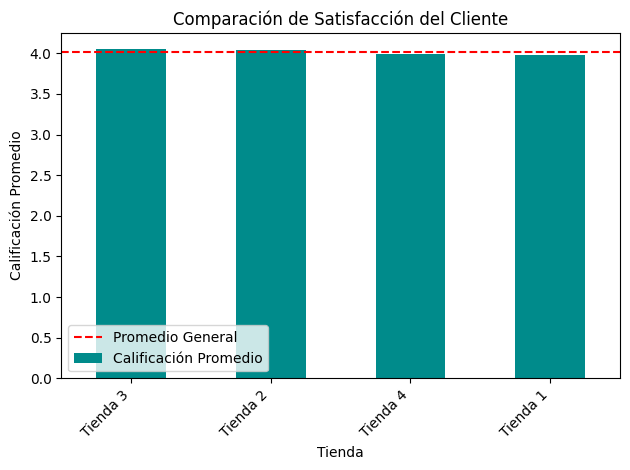

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con tus DataFrames
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Procesamiento para cada tienda
resultados = []
for nombre, df in tiendas.items():
    print(f"\n=== {nombre} ===")
    print("An√°lisis de satisfacci√≥n:")

    # Verificamos que la columna existe
    if 'Calificaci√≥n' in df.columns:  # Ajusta el nombre si es diferente
        # C√°lculo del promedio
        promedio = df['Calificaci√≥n'].mean()
        resultados.append({'Tienda': nombre, 'Calificaci√≥n Promedio': promedio})

        # Mostrar resultados b√°sicos
        print(f"Calificaci√≥n promedio: {promedio:.2f}")

        # An√°lisis por categor√≠a si existe
        if 'Categor√≠a del Producto' in df.columns:
            print("\nCalificaci√≥n por categor√≠a:")
            calif_categoria = df.groupby('Categor√≠a del Producto')['Calificaci√≥n'].mean()
            print(calif_categoria.sort_values(ascending=False).to_string())

    else:
        print(f"Error: La columna 'Calificaci√≥n' no existe en {nombre}")
        print("Columnas disponibles:", df.columns.tolist())

# Resultados consolidados
if resultados:
    print("\n‚≠ê RESUMEN COMPARATIVO ‚≠ê")
    resumen = pd.DataFrame(resultados).sort_values('Calificaci√≥n Promedio', ascending=False)
    print(resumen.to_string(index=False))

    # Gr√°fico comparativo
    plt.figure(figsize=(10, 5))
    resumen.plot.bar(
        x='Tienda',
        y='Calificaci√≥n Promedio',
        title='Comparaci√≥n de Satisfacci√≥n del Cliente',
        color='darkcyan',
        legend=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Calificaci√≥n Promedio')
    plt.axhline(resumen['Calificaci√≥n Promedio'].mean(), color='red', linestyle='--',
               label='Promedio General')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 4. Productos m√°s y menos vendidos


üìä Tienda 1 - An√°lisis de productos

‚úÖ TOP 5 PRODUCTOS M√ÅS VENDIDOS:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56

‚ùå 5 PRODUCTOS MENOS VENDIDOS:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presi√≥n                35
Auriculares con micr√≥fono      33
Celular ABXY                   33


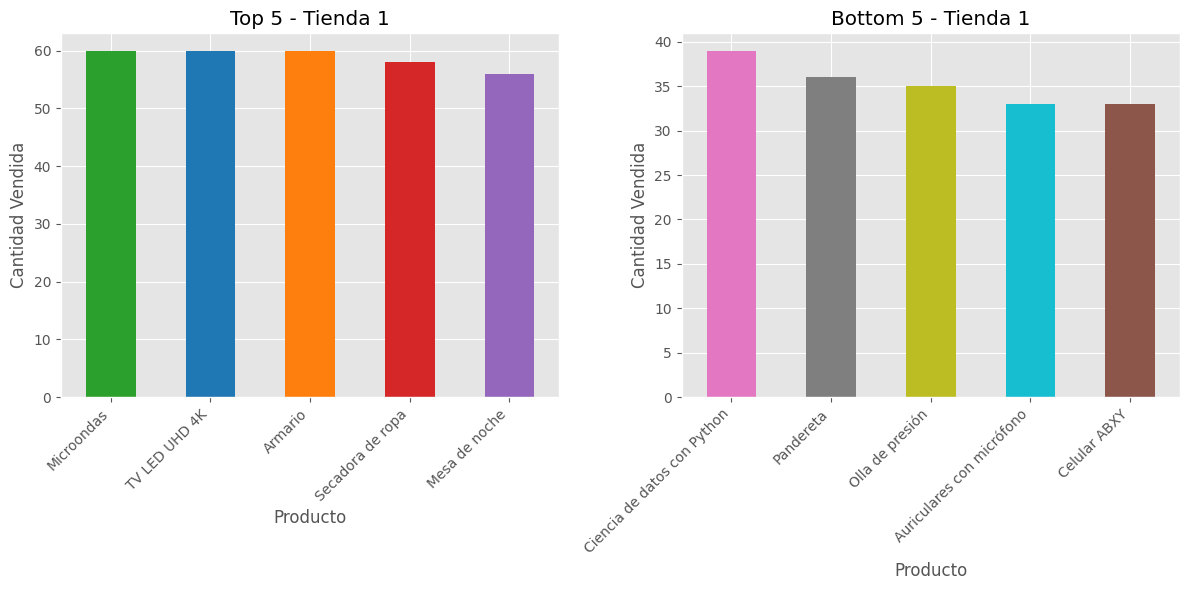

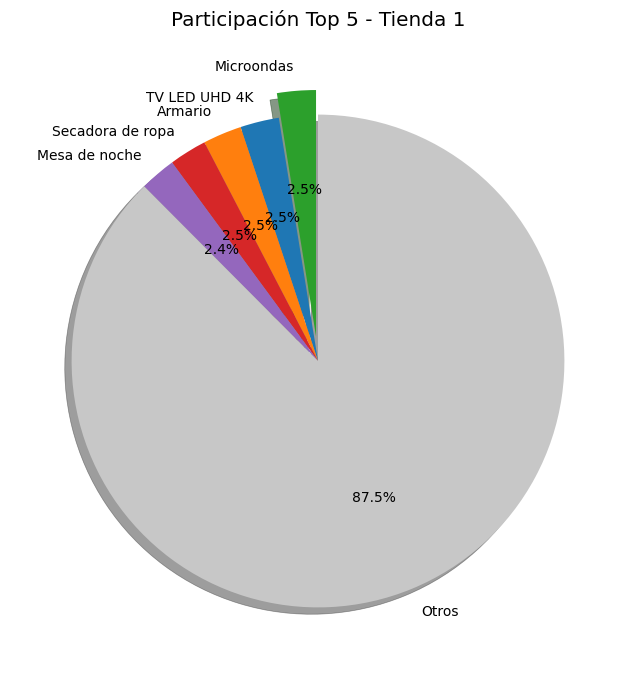


üìä Tienda 2 - An√°lisis de productos

‚úÖ TOP 5 PRODUCTOS M√ÅS VENDIDOS:
Producto
Iniciando en programaci√≥n    65
Microondas                   62
Bater√≠a                      61
Guitarra ac√∫stica            58
Pandereta                    58

‚ùå 5 PRODUCTOS MENOS VENDIDOS:
Producto
Auriculares        37
Sill√≥n             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32


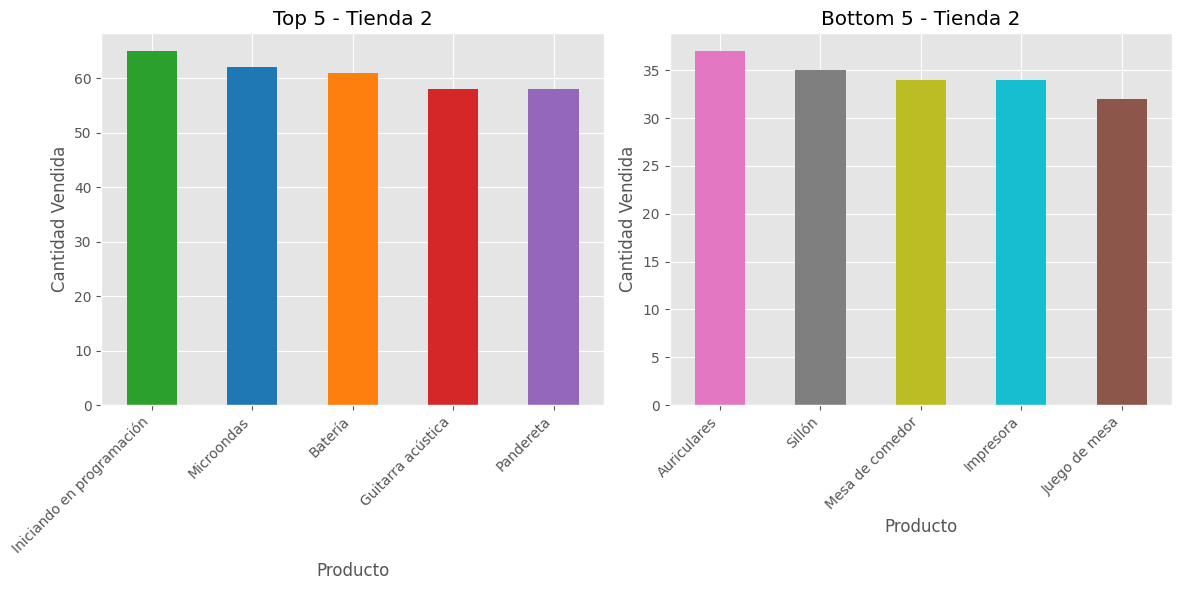

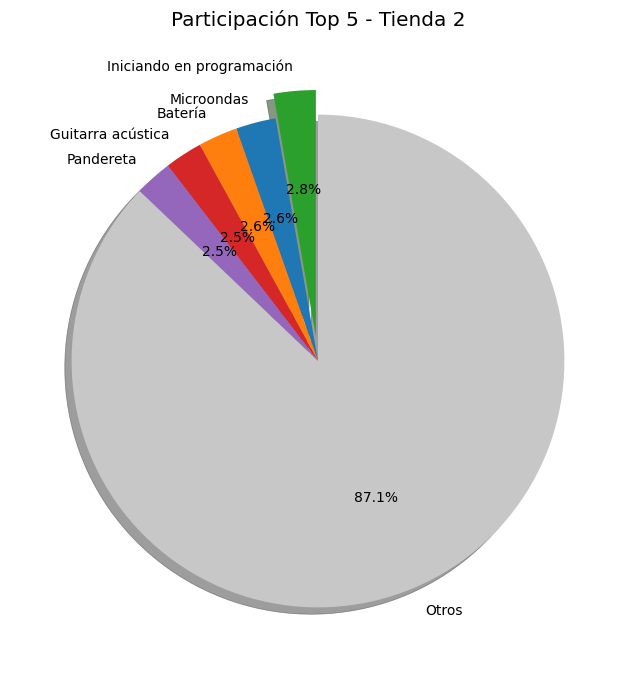


üìä Tienda 3 - An√°lisis de productos

‚úÖ TOP 5 PRODUCTOS M√ÅS VENDIDOS:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55

‚ùå 5 PRODUCTOS MENOS VENDIDOS:
Producto
Guitarra el√©ctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcci√≥n    35


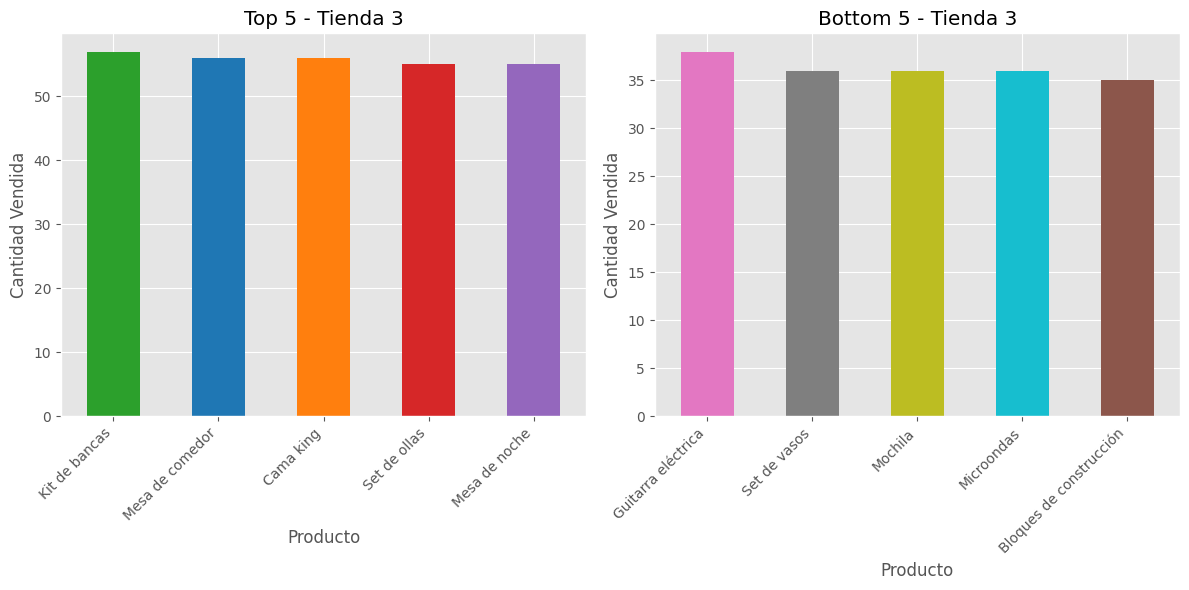

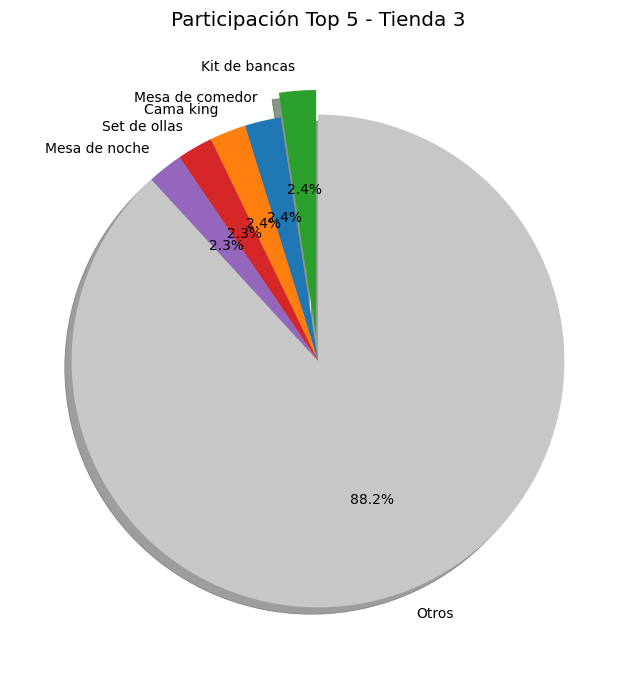


üìä Tienda 4 - An√°lisis de productos

‚úÖ TOP 5 PRODUCTOS M√ÅS VENDIDOS:
Producto
Cama box                     62
Cuberter√≠a                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55

‚ùå 5 PRODUCTOS MENOS VENDIDOS:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra ac√∫stica              37
Armario                        34
Guitarra el√©ctrica             33


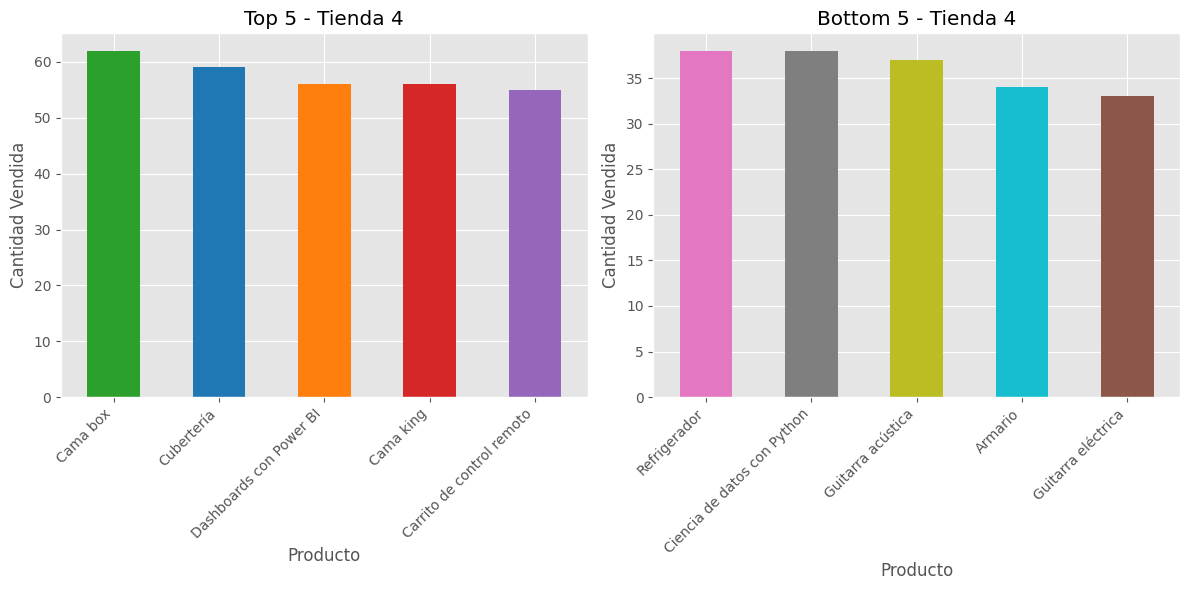

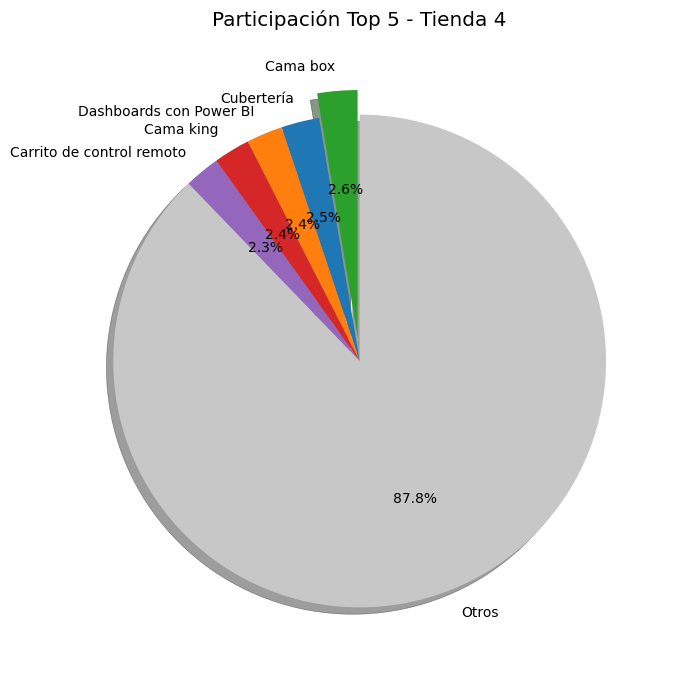


üîç An√°lisis completado para todas las tiendas


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuraci√≥n de estilo
plt.style.use('ggplot')  # Usamos el estilo ggplot que viene con matplotlib

# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas.items():
    print(f"\nüìä {nombre} - An√°lisis de productos")

    # Verificar columna de productos
    if 'Producto' not in df.columns:
        print("‚ö†Ô∏è Advertencia: No se encontr√≥ la columna 'Producto'")
        print("Columnas disponibles:", df.columns.tolist())
        continue

    # Conteo de productos
    productos_vendidos = df['Producto'].value_counts()
    total_productos = productos_vendidos.sum()

    # Top 5 y √∫ltimos 5 (excluyendo no vendidos)
    top_5 = productos_vendidos.head(5)
    bottom_5 = productos_vendidos[productos_vendidos > 0].tail(5)

    # Mostrar resultados en consola
    print("\n‚úÖ TOP 5 PRODUCTOS M√ÅS VENDIDOS:")
    print(top_5.to_string())

    print("\n‚ùå 5 PRODUCTOS MENOS VENDIDOS:")
    print(bottom_5.to_string())

    # Gr√°fico de los m√°s vendidos
    plt.figure(figsize=(12, 6))

    # Gr√°fico 1: Top 5 productos
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posici√≥n 1
    top_5.plot(kind='bar', color=['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd'])
    plt.title(f'Top 5 - {nombre}')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    # Gr√°fico 2: Bottom 5 productos
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posici√≥n 2
    bottom_5.plot(kind='bar', color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#8c564b'])
    plt.title(f'Bottom 5 - {nombre}')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Gr√°fico de participaci√≥n de mercado del top 5
    plt.figure(figsize=(8, 8))
    participacion = top_5 / total_productos * 100
    otros = 100 - participacion.sum()
    participacion['Otros'] = otros

    participacion.plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     explode=(0.1, 0, 0, 0, 0, 0),
                     shadow=True,
                     colors=['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#c7c7c7'])
    plt.title(f'Participaci√≥n Top 5 - {nombre}', pad=20)
    plt.ylabel('')
    plt.show()

print("\nüîç An√°lisis completado para todas las tiendas")

# 5. Env√≠o promedio por tienda


üì¶ Tienda 1 - An√°lisis de costos de env√≠o
üí∞ Costo promedio de env√≠o: $26018.61
üìä Mediana de costos: $12400.00
‚¨áÔ∏è M√≠nimo costo: $0.00
‚¨ÜÔ∏è M√°ximo costo: $160800.00


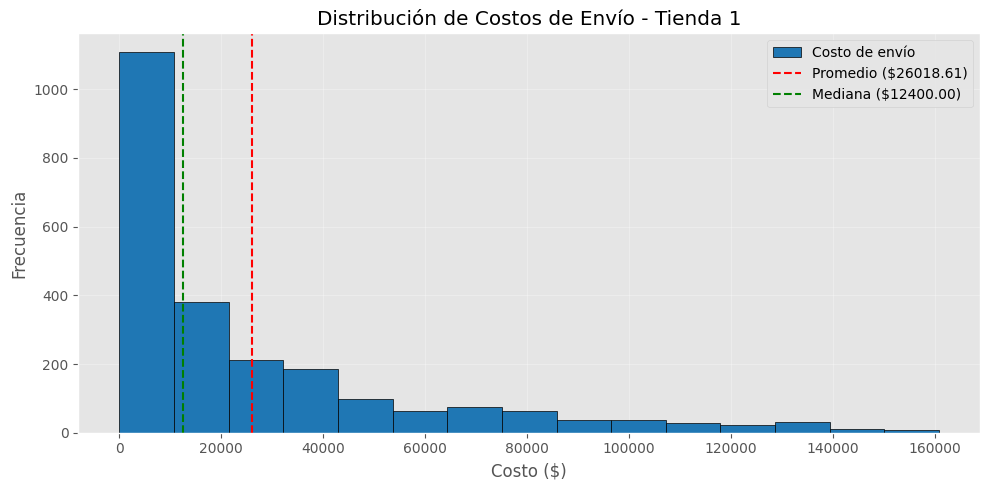


üì¶ Tienda 2 - An√°lisis de costos de env√≠o
üí∞ Costo promedio de env√≠o: $25216.24
üìä Mediana de costos: $11600.00
‚¨áÔ∏è M√≠nimo costo: $0.00
‚¨ÜÔ∏è M√°ximo costo: $162500.00


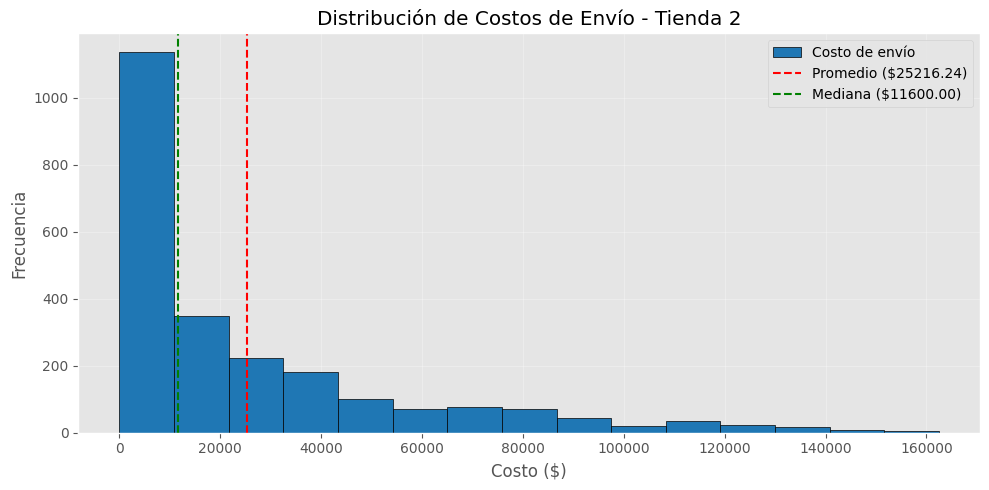


üì¶ Tienda 3 - An√°lisis de costos de env√≠o
üí∞ Costo promedio de env√≠o: $24805.68
üìä Mediana de costos: $11900.00
‚¨áÔ∏è M√≠nimo costo: $0.00
‚¨ÜÔ∏è M√°ximo costo: $158400.00


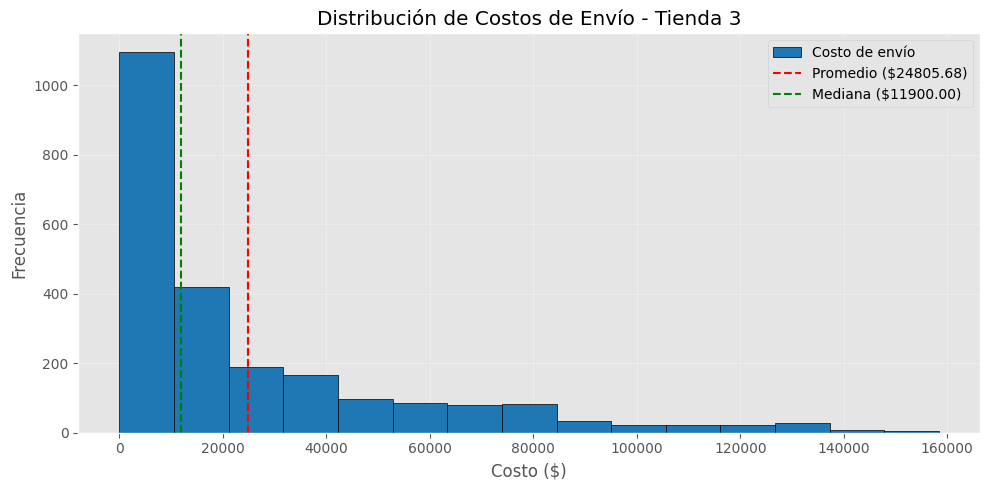


üì¶ Tienda 4 - An√°lisis de costos de env√≠o
üí∞ Costo promedio de env√≠o: $23459.46
üìä Mediana de costos: $10950.00
‚¨áÔ∏è M√≠nimo costo: $0.00
‚¨ÜÔ∏è M√°ximo costo: $154700.00


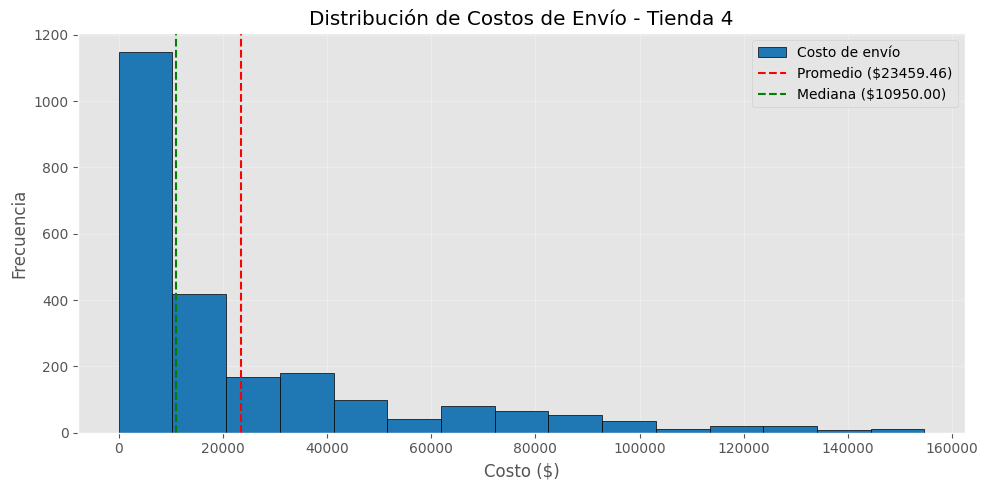


üìå RESUMEN COMPARATIVO DE COSTOS DE ENV√çO
  Tienda  Costo Promedio  Costo Mediano  M√≠nimo   M√°ximo
Tienda 1    26018.609580        12400.0     0.0 160800.0
Tienda 2    25216.235693        11600.0     0.0 162500.0
Tienda 3    24805.680373        11900.0     0.0 158400.0
Tienda 4    23459.457167        10950.0     0.0 154700.0


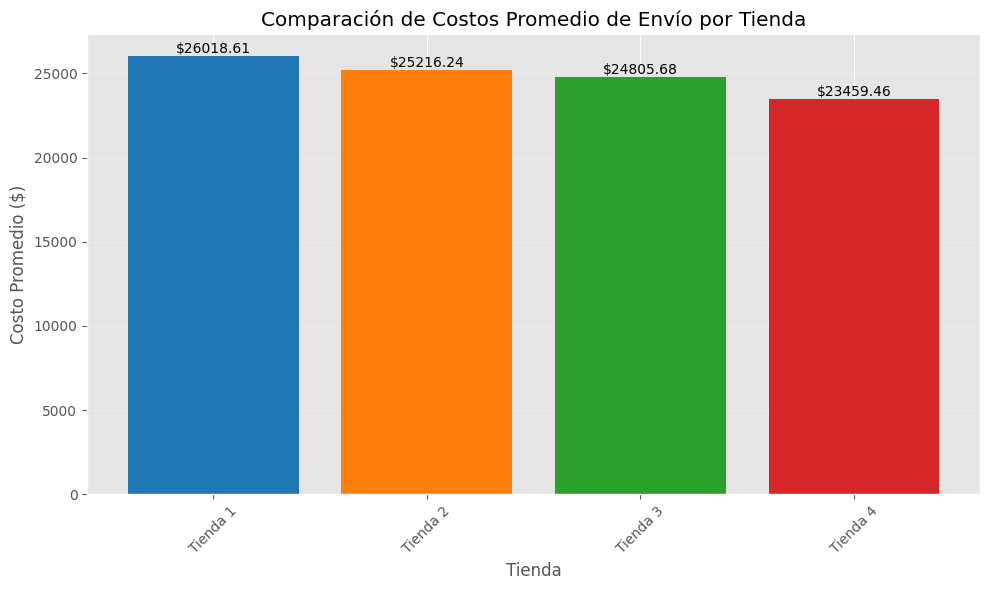

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuraci√≥n de estilo
plt.style.use('ggplot')

# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Lista para almacenar resultados
resultados_envios = []

for nombre, df in tiendas.items():
    print(f"\nüì¶ {nombre} - An√°lisis de costos de env√≠o")

    # Verificar columna de costos de env√≠o
    columna_envio = 'Costo de env√≠o'  # Puedes ajustar este nombre seg√∫n tus datos

    if columna_envio in df.columns:
        # C√°lculos estad√≠sticos
        promedio = df[columna_envio].mean()
        mediana = df[columna_envio].median()
        minimo = df[columna_envio].min()
        maximo = df[columna_envio].max()

        # Almacenar resultados
        resultados_envios.append({
            'Tienda': nombre,
            'Costo Promedio': promedio,
            'Costo Mediano': mediana,
            'M√≠nimo': minimo,
            'M√°ximo': maximo
        })

        # Mostrar resultados por tienda
        print(f"üí∞ Costo promedio de env√≠o: ${promedio:.2f}")
        print(f"üìä Mediana de costos: ${mediana:.2f}")
        print(f"‚¨áÔ∏è M√≠nimo costo: ${minimo:.2f}")
        print(f"‚¨ÜÔ∏è M√°ximo costo: ${maximo:.2f}")

        # Histograma de distribuci√≥n de costos
        plt.figure(figsize=(10, 5))
        df[columna_envio].plot.hist(bins=15, color='#1f77b4', edgecolor='black')
        plt.title(f'Distribuci√≥n de Costos de Env√≠o - {nombre}')
        plt.xlabel('Costo ($)')
        plt.ylabel('Frecuencia')
        plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio (${promedio:.2f})')
        plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana (${mediana:.2f})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    else:
        print(f"‚ö†Ô∏è Advertencia: No se encontr√≥ la columna '{columna_envio}'")
        print("Columnas disponibles:", df.columns.tolist())

# Resultados consolidados
if resultados_envios:
    df_resultados = pd.DataFrame(resultados_envios)
    df_resultados = df_resultados.sort_values('Costo Promedio', ascending=False)

    print("\nüìå RESUMEN COMPARATIVO DE COSTOS DE ENV√çO")
    print(df_resultados.to_string(index=False))

    # Gr√°fico comparativo entre tiendas
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_resultados['Tienda'], df_resultados['Costo Promedio'],
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    # A√±adir etiquetas con los valores
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.2f}',
                ha='center', va='bottom')

    plt.title('Comparaci√≥n de Costos Promedio de Env√≠o por Tienda')
    plt.ylabel('Costo Promedio ($)')
    plt.xlabel('Tienda')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se pudo calcular ning√∫n costo de env√≠o. Verifica los nombres de las columnas.")